In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
energy_df = pd.read_csv('energy_dataset.csv')
weather_df = pd.read_csv('weather_features.csv')

In [3]:
def check_all_zero(df):
    all_zero_column=[]
    for column in energy_df:
        all_zeros_or_null = (energy_df[column] == 0) | pd.isnull(energy_df[column])
        if all_zeros_or_null.all()==True:
            all_zero_column.append(column)
    return all_zero_column

all_cero_column = check_all_zero(energy_df)

In [4]:
def drop_column(df, columns):
    return df.drop(columns, axis=1)

energy_df =drop_column(energy_df,all_cero_column)


energy_df
energy_df.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [5]:
# focus on total load actual 
# we are looking at predicting power usage, only look at total load actually
import pandas as pd
def pre_process_totalload(df):
    df["time"] = pd.to_datetime(df["time"] ,utc=True)

    df.set_index('time', inplace=True)
    total_load_df = df[["total load actual"]]

    total_load_df["month"]= total_load_df.index.month
    total_load_df["weekday"]= total_load_df.index.weekday
    total_load_df["hour"]= total_load_df.index.hour

    total_load_df = pd.get_dummies(total_load_df, columns=['hour'], dtype=int)

    return total_load_df

total_load_df= pre_process_totalload(energy_df)


/var/folders/5c/kj6yt0yn1tlgdrljzqyqr5jc0000gn/T/ipykernel_77168/702637883.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_load_df["month"]= total_load_df.index.month
/var/folders/5c/kj6yt0yn1tlgdrljzqyqr5jc0000gn/T/ipykernel_77168/702637883.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_load_df["weekday"]= total_load_df.index.weekday
/var/folders/5c/kj6yt0yn1tlgdrljzqyqr5jc0000gn/T/ipykernel_77168/702637883.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [6]:
total_load_df

,total load actual,month,weekday,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,25385.0,12,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2015-01-01 00:00:00+00:00,24382.0,1,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-01 01:00:00+00:00,22734.0,1,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-01 02:00:00+00:00,21286.0,1,3,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-01 03:00:00+00:00,20264.0,1,3,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 18:00:00+00:00,30653.0,12,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2018-12-31 19:00:00+00:00,29735.0,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2018-12-31 20:00:00+00:00,28071.0,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [7]:
def pre_process(df):
    all_cero_column=check_all_zero(df)
    df= drop_column(df,all_cero_column)
    total_load_df=pre_process_totalload(df)
    print(total_load_df.isnull().values.any())
    return total_load_df


In [8]:
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
def build_nn_normal_model(input_shape, hidden, stddev_guess=1):
    model_in = tf.keras.Input(shape=input_shape, dtype='float32')
    x = model_in
    for h in hidden:
        x = keras.layers.Dense(h, activation='relu')(x)
    mu_logsigma = tf.keras.layers.Dense(2, activation='linear')(x)
    lf = lambda t: tfp.distributions.Normal(loc=t[:, :1], scale=tf.math.exp(t[:, 1:]))
    model_out = tfp.layers.DistributionLambda(lf)(mu_logsigma)
    model = tf.keras.Model(model_in, model_out)
    return model


In [9]:
from pydotplus import InvocationException

In [10]:
total_load_df

,total load actual,month,weekday,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,25385.0,12,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2015-01-01 00:00:00+00:00,24382.0,1,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-01 01:00:00+00:00,22734.0,1,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-01 02:00:00+00:00,21286.0,1,3,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-01 03:00:00+00:00,20264.0,1,3,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 18:00:00+00:00,30653.0,12,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2018-12-31 19:00:00+00:00,29735.0,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2018-12-31 20:00:00+00:00,28071.0,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [11]:
from sklearn.model_selection import train_test_split
import pandas as pd
total_load_df = total_load_df.dropna()
y_df=total_load_df["total load actual"].astype('float64')
X_df=total_load_df.drop("total load actual", axis=1)

sep = '2018-01-01'
#normalize weekday and month
X_df['weekday'] = X_df['weekday'] / 6
X_df["month"] = X_df["month"]/12
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
input_shape=len(X_df.columns)

In [28]:
X_df

,month,weekday,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,1.000000,0.333333,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2015-01-01 00:00:00+00:00,0.083333,0.500000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-01 01:00:00+00:00,0.083333,0.500000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-01 02:00:00+00:00,0.083333,0.500000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-01 03:00:00+00:00,0.083333,0.500000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 18:00:00+00:00,1.000000,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2018-12-31 19:00:00+00:00,1.000000,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2018-12-31 20:00:00+00:00,1.000000,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Want to use load forecast which will be used as a baseline later

In [12]:
energy_df_2 = energy_df.dropna(subset=["total load actual"])
energy_df_2 

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 18:00:00+00:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,63.0,95.0,85.0,277.0,3113.0,96.0,3253.0,30619.0,30653.0,68.85,77.02
2018-12-31 19:00:00+00:00,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,62.0,95.0,33.0,280.0,3288.0,51.0,3353.0,29932.0,29735.0,68.40,76.16
2018-12-31 20:00:00+00:00,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,61.0,94.0,31.0,286.0,3503.0,36.0,3404.0,27903.0,28071.0,66.88,74.30


In [13]:
#Seperate training and test set
sep = '2018-01-01'
X_train = X_df[X_df.index < sep]
y_train = y_df[y_df.index < sep]
X_test = X_df[X_df.index >= sep]
y_test= y_df[y_df.index >= sep]

mean_train = y_train.mean()
std_train = y_train.std()

# y_train_normalized = (y_train - mean_train) / std_train
# y_test_normalized = (y_test - mean_train) / std_train


Add total load forecast which will be used as a baseline later

In [14]:
total_load_forecast_train = energy_df_2[X_df.index < sep]["total load forecast"]
total_load_forecast_test = energy_df_2[X_df.index >= sep]["total load forecast"]

Plot Distribution of training data vs test data 

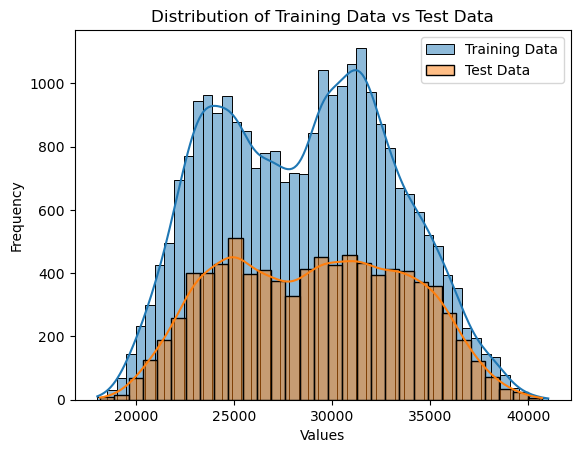

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_train and y_test are your training and test data
sns.histplot(y_train, kde=True, label='Training Data')
sns.histplot(y_test, kde=True, label='Test Data')
plt.legend()
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Training Data vs Test Data')
plt.show()

In [16]:
y_train

time
2014-12-31 23:00:00+00:00    25385.0
2015-01-01 00:00:00+00:00    24382.0
2015-01-01 01:00:00+00:00    22734.0
2015-01-01 02:00:00+00:00    21286.0
2015-01-01 03:00:00+00:00    20264.0
                              ...   
2017-12-31 19:00:00+00:00    28666.0
2017-12-31 20:00:00+00:00    27260.0
2017-12-31 21:00:00+00:00    25043.0
2017-12-31 22:00:00+00:00    23680.0
2017-12-31 23:00:00+00:00    22779.0
Name: total load actual, Length: 26271, dtype: float64

In [17]:

from util.neuralprobabilistic import train_nn_model
from tensorflow import keras


# Define the neural network architecture
model_in = tf.keras.Input(shape=input_shape, dtype=tf.float32)
x=model_in
#x = tf.keras.layers.Dense(hidden_neurons, activation='relu')(model_in)
mu_logsigma = tf.keras.layers.Dense(2, activation='linear')(x)
# Define a lambda function for the distribution
lf = lambda t: tfp.distributions.Normal(loc=t[:, :1], scale=tf.math.exp(t[:, 1:]))

# Create the output layer using DistributionLambda
model_out = tfp.layers.DistributionLambda(lf)(mu_logsigma)

# Create the probabilistic neural network model
model = tf.keras.Model(model_in, model_out)


keras.utils.plot_model(model, show_shapes=True,show_layer_names=True, rankdir='LR', show_layer_activations=True)


In [18]:
def custom_loss(y_true, dist):
    # Extract mean and standard deviation from the distribution
    mean = dist.loc
    std = dist.scale

    # Adjust the scale parameter as needed
    scaled_std = std * 0.1

    # Calculate the negative log-likelihood
    negloglik = -tfp.distributions.Normal(mean, std).log_prob(y_true)

    return tf.reduce_mean(negloglik)


# Compile the model with a suitable loss function

#This gave way to large values
negloglikelihood = lambda y_true, dist: -dist.log_prob(y_true)
model.compile(optimizer='adam', loss=negloglikelihood)

# Train the model
history = model.fit(X_train, y_train_normalized, epochs=100, batch_size=42,validation_split=0.0, verbose=True)
print(history.history)
# Fun

#model = build_nn_normal_model(input_shape=(35064, 3), hidden=2)

#Choose Mean Squared Error (MSE): Suitable for continuous values. It penalizes larger errors more heavily.
#look into fit_params
#history = train_nn_model(model = model, X=X, y=y, loss="mean_squared_error")

Epoch 1/100
626/626 [==============================] - 0s 375us/step - loss: 1.3839
Epoch 2/100
626/626 [==============================] - 0s 350us/step - loss: 1.1132
Epoch 3/100
626/626 [==============================] - 0s 359us/step - loss: 0.9884
Epoch 4/100
626/626 [==============================] - 0s 370us/step - loss: 0.9478
Epoch 5/100
626/626 [==============================] - 0s 375us/step - loss: 0.9393
Epoch 6/100
626/626 [==============================] - 0s 346us/step - loss: 0.9374
Epoch 7/100
626/626 [==============================] - 0s 337us/step - loss: 0.9371
Epoch 8/100
626/626 [==============================] - 0s 466us/step - loss: 0.9370
Epoch 9/100
626/626 [==============================] - 0s 353us/step - loss: 0.9370
Epoch 10/100
626/626 [==============================] - 0s 421us/step - loss: 0.9371
Epoch 11/100
626/626 [==============================] - 0s 369us/step - loss: 0.9369
Epoch 12/100
626/626 [==============================] - 0s 348us/step - lo

In [19]:
print(model)
print(history)

train_loss = history.history['loss']
#val_loss = history.history['val_loss']

print(train_loss)
print(history.history)

[1.3838545083999634, 1.1132006645202637, 0.9884448647499084, 0.9478101134300232, 0.9392940998077393, 0.9374046921730042, 0.9370959401130676, 0.9370079040527344, 0.9370045065879822, 0.9371262788772583, 0.9368789196014404, 0.9369535446166992, 0.9368639588356018, 0.9370623230934143, 0.936915934085846, 0.9369474649429321, 0.9369558691978455, 0.9368548393249512, 0.9368425011634827, 0.937003493309021, 0.936914324760437, 0.9370091557502747, 0.937025249004364, 0.9370372295379639, 0.9369494915008545, 0.9369410872459412, 0.9369207620620728, 0.9371061325073242, 0.9369257092475891, 0.9370518326759338, 0.9369595646858215, 0.9369918704032898, 0.9370379447937012, 0.9369623064994812, 0.9369236826896667, 0.9370386600494385, 0.9370342493057251, 0.9370695352554321, 0.9369012713432312, 0.9369405508041382, 0.9369441866874695, 0.936912477016449, 0.9370360970497131, 0.9370571374893188, 0.9369500875473022, 0.9370763301849365, 0.9370896816253662, 0.9368975162506104, 0.9369252920150757, 0.937016487121582, 0.936

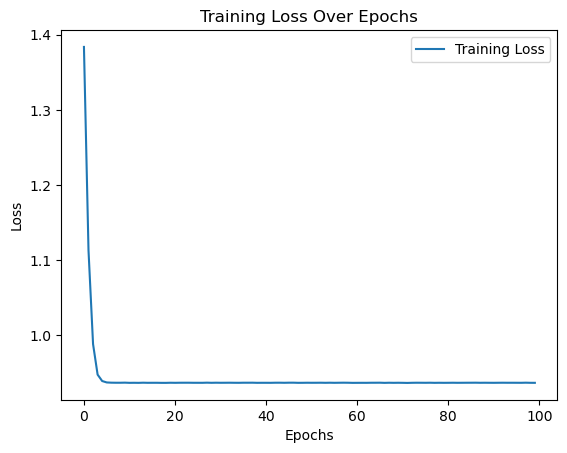

In [20]:
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


110/274 [===========>..................] - ETA: 0s 

274/274 [==============================] - 0s 357us/step


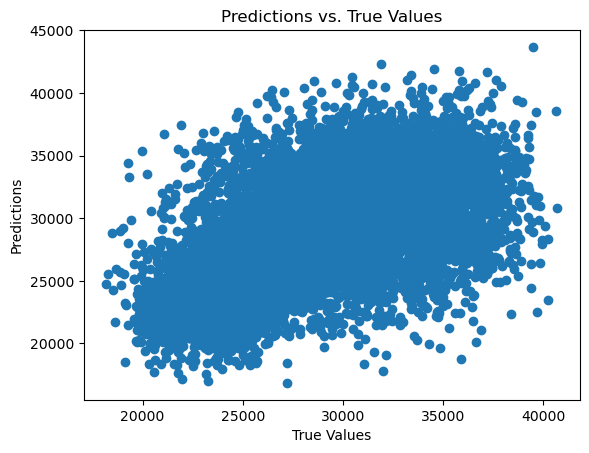

[[25898.59 ]
 [22097.2  ]
 [25167.248]
 ...
 [27965.828]
 [30793.607]
 [27922.486]]


In [21]:
predictions = model.predict(X_test)
# Apply inverse transformation to bring predictions back to original scale
predictions = predictions * std_train + mean_train

# Plot predictions vs. targets
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predictions vs. True Values')
plt.show()
#util.plot_pred_scatter(y_test, ts_pred, figsize=figsize)
print(predictions)

In [22]:
# Create a DataFrame with the index of X_test
result_df = pd.DataFrame(index=y_test.index)

# Add columns for predictions and true values
result_df['predictions'] = predictions.flatten()  # Flatten the predictions array
result_df['true values'] = y_test.values #
result_df["total load forecast"] = total_load_forecast_test.values

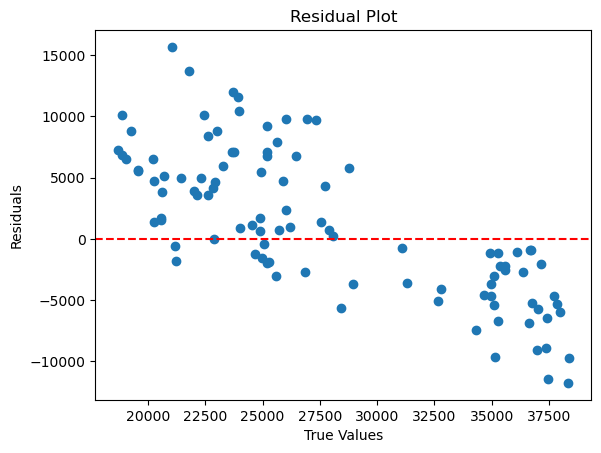

In [23]:


residuals = result_df[0:100]['predictions'] -result_df[0:100]["true values"]
plt.scatter(result_df[0:100]["true values"], residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


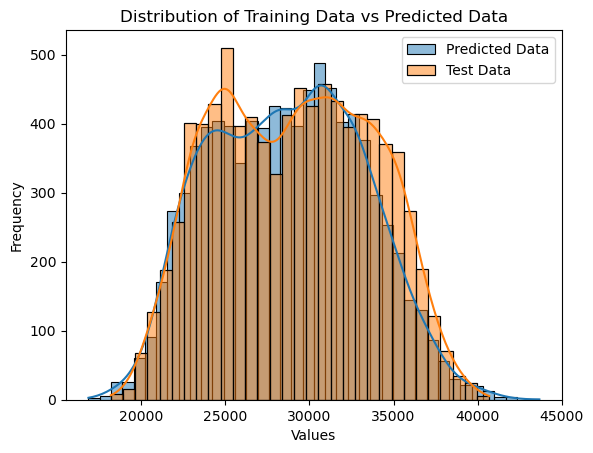

In [24]:
# Assuming y_train and y_test are your training and test data
sns.histplot(result_df["predictions"], kde=True, label="Predicted Data")
sns.histplot(y_test, kde=True, label='Test Data')
#sns.histplot(result_df['total load forecast'], kde=True, label='Total Load Forecast')
plt.legend()
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Training Data vs Predicted Data')
plt.show()

We can see that the predicted data leans more into the direction of large values, while test data does not. 

Text(0, 0.5, 'Difference')

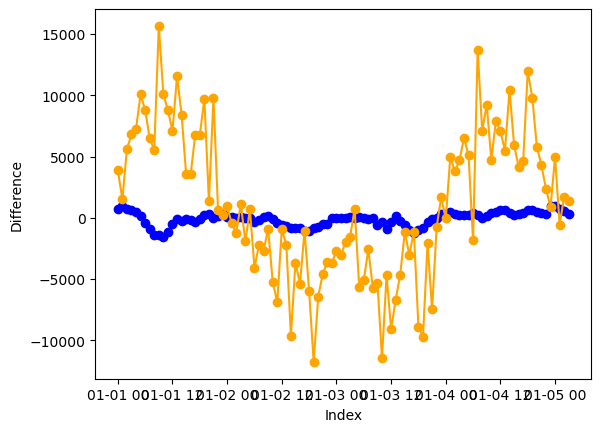

In [25]:
difference_forecast = result_df['total load forecast'][0:100] -result_df["true values"][0:100]
difference_predict = result_df['predictions'][0:100] -result_df["true values"][0:100]

# Plot the differences
plt.plot(result_df.index[0:100], difference_forecast, label='Forecast Difference', marker='o', linestyle='-', color='blue')
plt.plot(result_df.index[0:100], difference_predict, label='Prediction Difference', marker='o', linestyle='-', color='orange')

# Set labels and title
plt.xlabel('Index')
plt.ylabel('Difference')

As we can see the model does really badly:(

See that A lot of predictions are under 0, this is not the case in real life why?

DO normalization on input data
